Importing necessary libraries

In [ ]:
# Imports and Downloads
import nltk
import re
import string
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer
from nltk import FreqDist

# Download required resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab') # Download the punkt_tab resource

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

Ques 1

-------------------------------------------------
lets's talk about skating. skating is a sport not well recognized among other sports like cricket, tennis, badminton. but it is something that gives speed to our feet, wings to fly high.
-------------------------------------------------
letss talk about skating skating is a sport not well recognized among other sports like cricket tennis badminton but it is something that gives speed to our feet wings to fly high
-------------------------------------------------
['letss', 'talk', 'about', 'skating', 'skating', 'is', 'a', 'sport', 'not', 'well', 'recognized', 'among', 'other', 'sports', 'like', 'cricket', 'tennis', 'badminton', 'but', 'it', 'is', 'something', 'that', 'gives', 'speed', 'to', 'our', 'feet', 'wings', 'to', 'fly', 'high']
-------------------------------------------------
['letss talk about skating skating is a sport not well recognized among other sports like cricket tennis badminton but it is something that gives speed to o

<Axes: title={'center': 'Top Words'}, xlabel='Samples', ylabel='Counts'>

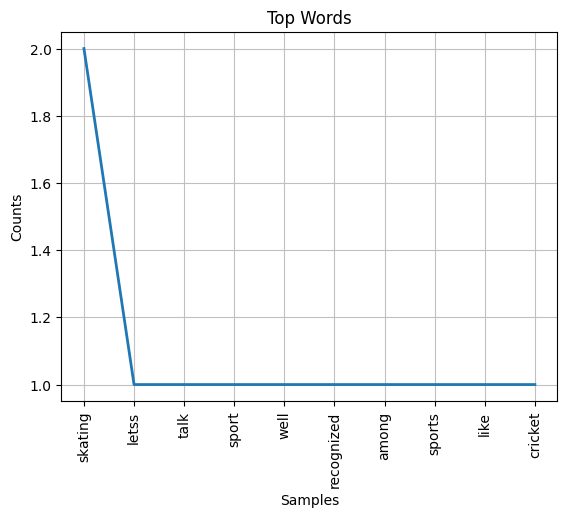

In [ ]:
import string
text = "Lets's Talk about Skating. Skating is a sport not well recognized among other sports like cricket, tennis, Badminton. But it is something that gives speed to our feet, wings to fly high."
print("-------------------------------------------------")
#1
text_lower = text.lower()
print(text_lower)
print("-------------------------------------------------")
text_no_punct = text_lower.translate(str.maketrans('', '', string.punctuation))
print(text_no_punct)
#2
print("-------------------------------------------------")
word_tokens = word_tokenize(text_no_punct)
print(word_tokens)
print("-------------------------------------------------")
sent_tokens = sent_tokenize(text_no_punct)
print(sent_tokens)
#3
print("-------------------------------------------------")
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in word_tokens if word.casefold() not in stop_words]
print(filtered_tokens)
#4
print("-------------------------------------------------")
fd = FreqDist(filtered_tokens)
print(fd.most_common(10))
fd.plot(10, title = "Top Words", cumulative=False)

Ques 2

In [ ]:
import pandas as pd
#1
print(filtered_tokens)
print("-------------------------------------------------")
#2 and 3
ps = PorterStemmer()
ln = LancasterStemmer()
lm = WordNetLemmatizer()
data = []
for word in filtered_tokens:
  porter_stem = ps.stem(word)
  lancaster_stem = ln.stem(word)
  lemma = lm.lemmatize(word)
  data.append([word, porter_stem, lancaster_stem, lemma])

df = pd.DataFrame(data, columns=["Word", "PorterStemmed Word", "LancasterStemmed Word", "Lemmatizer Word"])
display(df)


['letss', 'talk', 'skating', 'skating', 'sport', 'well', 'recognized', 'among', 'sports', 'like', 'cricket', 'tennis', 'badminton', 'something', 'gives', 'speed', 'feet', 'wings', 'fly', 'high']
-------------------------------------------------


,Word,PorterStemmed Word,LancasterStemmed Word,Lemmatizer Word
0,letss,letss,letss,letss
1,talk,talk,talk,talk
2,skating,skate,skat,skating
3,skating,skate,skat,skating
4,sport,sport,sport,sport
5,well,well,wel,well
6,recognized,recogn,recogn,recognized
7,among,among,among,among
8,sports,sport,sport,sport
9,like,like,lik,like


Ques 3

In [ ]:
# prompt: Use regular expressions to:
# a. Extract all words with more than 5 leƩers.
# b. Extract all numbers (if any exist in their text).
# c. Extract all capitalized words.

import re

text = """Lets's Talk about Skating. Skating is a sport not well recognized among other sports like cricket, tennis, Badminton. But it is something that gives speed to our feet, wings to fly high."""

# a. Extract all words with more than 5 letters.
long_words = re.findall(r'\b\w{6,}\b', text)
print("Words with more than 5 letters:", long_words)

# b. Extract all numbers (if any exist in their text).
numbers = re.findall(r'\d+', text)
print("Numbers:", numbers)

# c. Extract all capitalized words.
capitalized_words = re.findall(r'\b[A-Z]\w*\b', text)
print("Capitalized words:", capitalized_words)


In [ ]:
#1
print(text)
#2
print("-------------------------------------------------")
print("Words with more than 5 letters:",re.findall(r'\b\w{6,}\b', text))
print("-------------------------------------------------")
print("Numbers:",re.findall(r'\d+', text))
print("-------------------------------------------------")
print("Capitalized words:",re.findall(r'\b[A-Z]\w*\b', text))
#3
print("-------------------------------------------------")
words = re.findall(r'\b[a-zA-Z]+\b', text)
print(words)
print("-------------------------------------------------")
vowel_words = re.findall(r'\b[aeiouAEIOU]\w*\b', text)
print(vowel_words)

Lets's Talk about Skating. Skating is a sport not well recognized among other sports like cricket, tennis, Badminton. But it is something that gives speed to our feet, wings to fly high.
-------------------------------------------------
Words with more than 5 letters: ['Skating', 'Skating', 'recognized', 'sports', 'cricket', 'tennis', 'Badminton', 'something']
-------------------------------------------------
Numbers: []
-------------------------------------------------
Capitalized words: ['Lets', 'Talk', 'Skating', 'Skating', 'Badminton', 'But']
-------------------------------------------------
['Lets', 's', 'Talk', 'about', 'Skating', 'Skating', 'is', 'a', 'sport', 'not', 'well', 'recognized', 'among', 'other', 'sports', 'like', 'cricket', 'tennis', 'Badminton', 'But', 'it', 'is', 'something', 'that', 'gives', 'speed', 'to', 'our', 'feet', 'wings', 'to', 'fly', 'high']
-------------------------------------------------
['about', 'is', 'a', 'among', 'other', 'it', 'is', 'our']


Ques 4

In [ ]:
#1
print(text)
print("--------------------------")
#2
pattern  = r"\b\w+(?:-\w+)*\b|\d+\.\d+|\w+'\w+"
tokens = re.findall(pattern, text)
print(tokens)
print("--------------------------")
#3
sample = "My email is example@email.com, you can visit my website at https://www.example.com or call me at 123-456-7890 or +91 9876543210."
print(sample)
sample = re.sub(r'\S+@\S+','<EMAIL>',sample)
sample = re.sub(r'(?:\+?\d{1,3}[-.\s]?)?\(?\d{3}\)?[-.\s]?\d{3}[-.\s]?\d{4}','<PHONE>', sample)
sample = re.sub(r'https?://(?:www\.)?[-a-zA-Z0-9@:%._+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b(?:[-a-zA-Z0-9()@:%_+.~#?&/=]*)', '<URL>', sample)
print(sample)



Lets's Talk about Skating. Skating is a sport not well recognized among other sports like cricket, tennis, Badminton. But it is something that gives speed to our feet, wings to fly high.
--------------------------
['Lets', 's', 'Talk', 'about', 'Skating', 'Skating', 'is', 'a', 'sport', 'not', 'well', 'recognized', 'among', 'other', 'sports', 'like', 'cricket', 'tennis', 'Badminton', 'But', 'it', 'is', 'something', 'that', 'gives', 'speed', 'to', 'our', 'feet', 'wings', 'to', 'fly', 'high']
--------------------------
My email is example@email.com, you can visit my website at https://www.example.com or call me at 123-456-7890 or +91 9876543210.
My email is <EMAIL> you can visit my website at <URL> or call me at <PHONE> or <PHONE>.
